<a href="https://www.kaggle.com/code/ahmetesmer/r4dut-x-titanic-eda?scriptVersionId=112934633" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

The sinking of Titanic is one of the most notorious shipwrecks in the history. In 1912, during her voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

<font color = '8AA4D7'> 
Content:
    
1. [LOAD and CHECK](#1)
2. [VARIABLE DESCRIPTION](#2) 
   * [UNIVARIATE VERIABLE ANALYSIS](#3)
       * [CATEGORICAL VARIABLE](#4)
       * [NUMERICAL VARIABLE](#5)
1. [BASIC DATA ANALYSIS](#6)    
1. [OUTLIER DETECTION](#7)    
1. [MISSING VALUE](#8)  
   * [FIND MISSING VALUE](#9) 
   * [FILL MISSING VALUE](#10)
1. [VISUALIZATION](#11) 
   * [Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived](#12)
   * [SibSp -- Survived](#13)
   * [Parch -- Survived](#14)
   * [Pclass -- Survived](#15)
   * [Age-- Survived](#16) 
   * [Pclass -- Survived -- Age](#17) 
   * [Embarked -- Sex -- Pclass -- Survived](#18) 
   * [Embarked -- Sex -- Fare -- Survived](#19)
   * [Fill Missing : Age Feature](#20)     
1. [FEATURE ENGINEERING](#22)  
   * [Name -- Title](#23)     
   * [Family Size](#24)
   * [Embarked](#25)
   * [Ticket](#26)
   * [Pclass](#27)  
   * [Sex](#28)  
   * [Drop Passenger ID and Cabin](#29)  
1. [Modeling](#30)   
   * [Train - Test Split](#31)   
   * [Simple Logistic Regression](#32)    
   * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#33)    
   * [Ensemble Modeling](#34)
   * [Prediction and Submission](#35)   

<a id = "1"></a>
# LOAD and CHECK
<a id = "21"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid") # grayscale
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_passengersId = test_df["PassengerId"]

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.shape

(891, 12)

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id = "2"></a>
# VARIABLE DESCRIPTION

1. PassengerId : Unique id number to each passenger
1. Survived : Passenger survive(1) or die(0)
1. Pclass : Passenger class with 3 values (1,2,3)
1. Name : Name of passenger 
1. Sex : Gender of passenger 
1. Age : Age of passenger
1. SibSp : Number of siblins and spouses
1. Parch : Number of parents and children
1. Ticket : Ticket number
1. Fare : Ticket price
1. Cabin : Cabin number
1. Embarked : Port of embarkation(S = Southampton , Q = Queenstown, C = Cherbourg)

### type of variables
* float64(2) : Age ,Fare 
* int64(5) : PassengerId ,Survived ,Pclass ,SibSp ,Parch
* object(5) : Name ,Sex ,Ticket ,Cabin ,Embarked


<a id = "3"></a>
## UNIVARIATE VERIABLE ANALYSIS
    * Categorical variable : Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked
    * Numerical variable : PassengerId,Age,Fare

<a id = "4"></a>
### CATEGORICAL VARIABLE

In [8]:
def bar_plot(variable):
    var = train_df[variable] # get features
    varvalue = var.value_counts() # count number of categorical samples
    plt.figure(figsize = (12,5))
    plt.bar(varvalue.index,varvalue)
    plt.xticks(varvalue.index,varvalue.index.values)
    plt.ylabel("Amount")
    plt.title(variable)
    plt.show()
    print("{} : \n  {}".format(variable,varvalue))

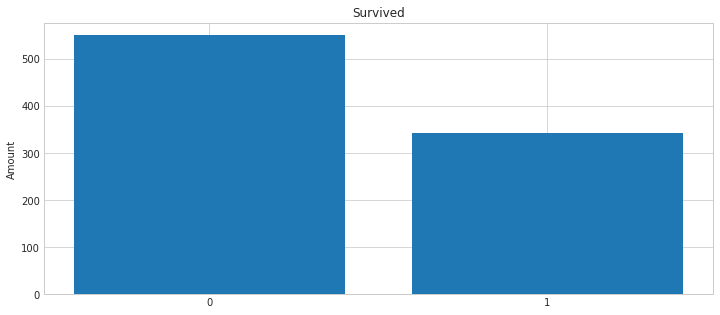

Survived : 
  0    549
1    342
Name: Survived, dtype: int64


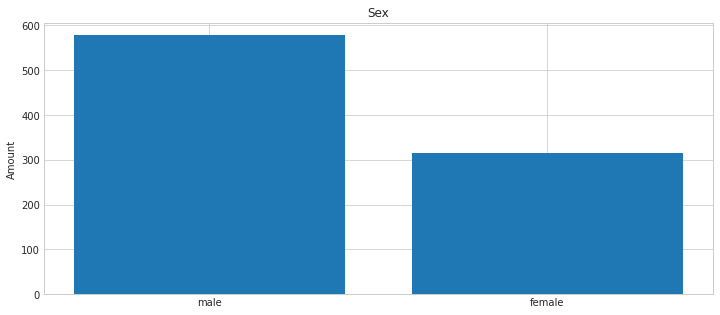

Sex : 
  male      577
female    314
Name: Sex, dtype: int64


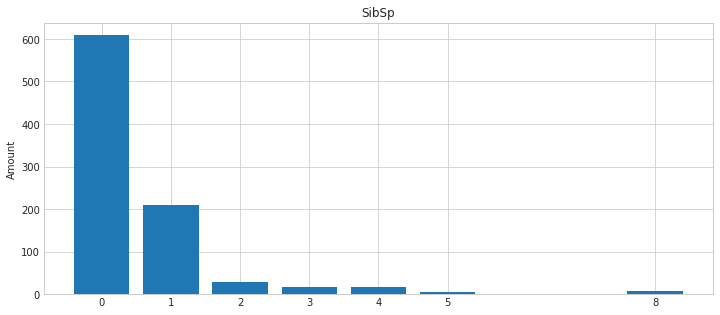

SibSp : 
  0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


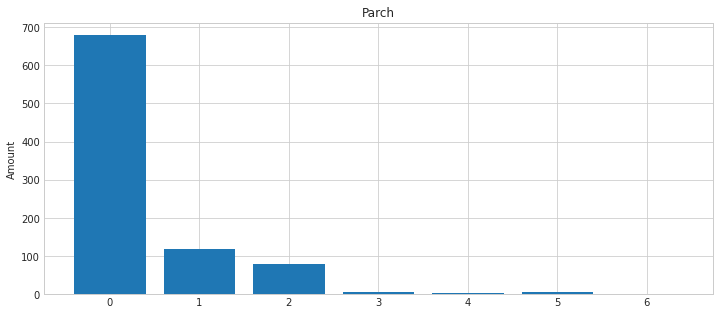

Parch : 
  0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


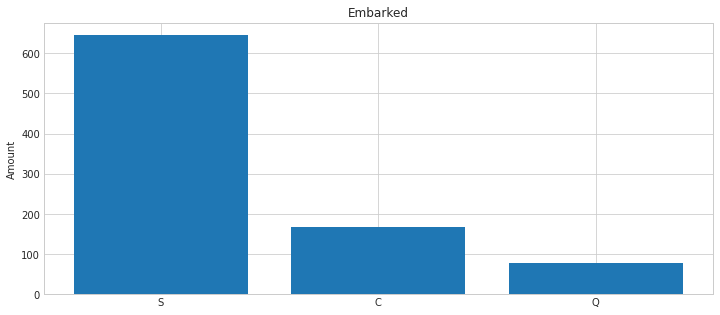

Embarked : 
  S    644
C    168
Q     77
Name: Embarked, dtype: int64


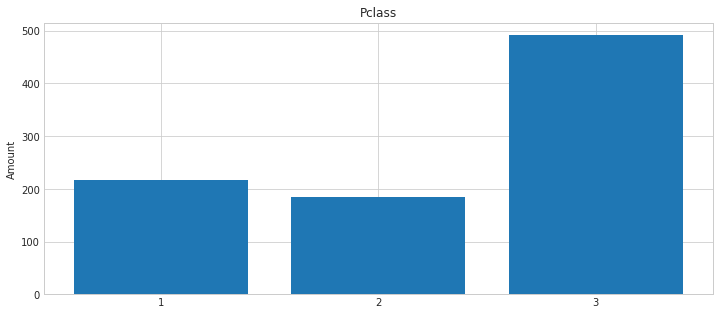

Pclass : 
  3    491
1    216
2    184
Name: Pclass, dtype: int64


In [9]:
# Categorical data not adding complexity
category1 = ["Survived","Sex","SibSp","Parch","Embarked","Pclass"]
for i in category1:
    bar_plot(i)

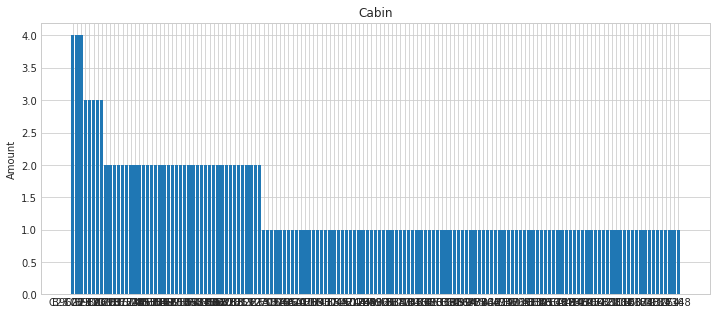

Cabin : 
  B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


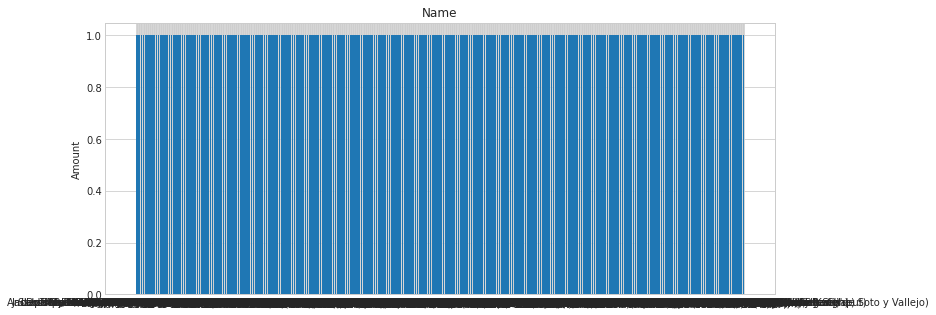

Name : 
  Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


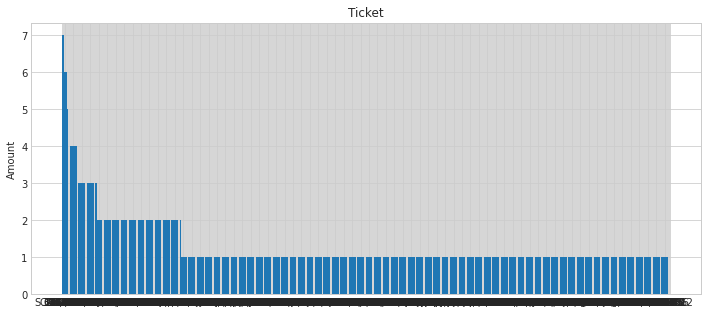

Ticket : 
  347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


In [10]:
# Categorical data adding complexity
category2 = ["Cabin","Name","Ticket"]
for i in category2:
    bar_plot(i)

<a id = "5"></a>
### NUMERICAL VARIABLE

In [11]:
def plot_hist(variable):
    plt.figure(figsize = (12,5))
    plt.hist(train_df[variable] , bins = 70)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

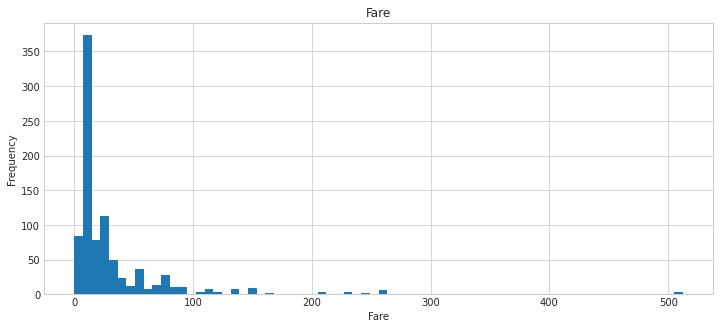

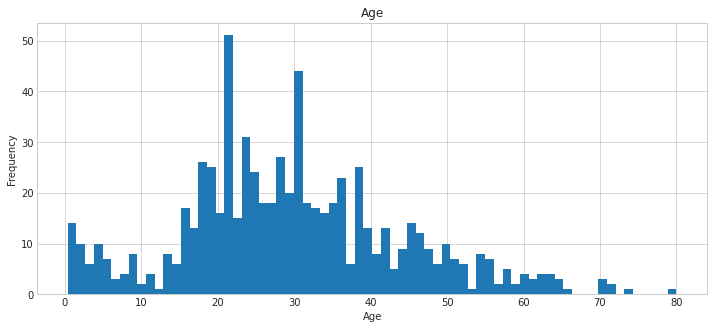

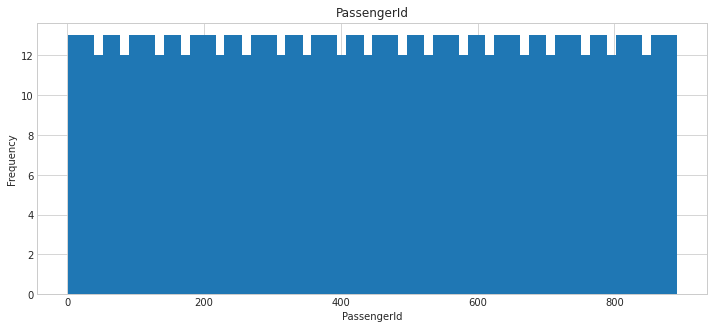

In [12]:
# PassengerId table originates from bins
category3  = ["Fare","Age","PassengerId"]
for i in category3:
    plot_hist(i)

<a id = "6"></a>
# BASIC DATA ANALYSIS
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived
* Embarked - Survived

## Pclass - Survived

In [13]:
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = True).mean().sort_values(by = "Survived", ascending = False) 

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


## Sex - Survived

In [14]:
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = True).mean().sort_values(by = "Survived", ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


## SibSp - Survived

In [15]:
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = True).mean().sort_values(by = "Survived",ascending = False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


## Parch - Survived

In [16]:
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = True).mean().sort_values(by = "Survived", ascending = False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


## Embarked - Survived

In [17]:
train_df[["Embarked","Survived"]].groupby(["Embarked"], as_index = True).mean().sort_values(by = "Survived", ascending = False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<a id = "7"></a>
# OUTLIER DETECTION

In [18]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for i in features:
        # 1st quartile
        Q1 = np.percentile(df[i],25)
        # 3rd quartile
        Q3 = np.percentile(df[i],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step 
        outlier_step = IQR * 1.5
        # Detect outlier and their indices
        outlier_list_col = df[(df[i] < Q1 - outlier_step) | (df[i] > Q3 + outlier_step)].index
        # Store indices
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 2 ) 
    return multiple_outliers    

In [19]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [20]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

<a id = "8"></a>
# MISSING VALUE

In [21]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

<a id = "9"></a>
## FIND MISSING VALUE

In [22]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [23]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

<a id = "10"></a>
## FILL MISSING VALUE
* Embarked has 2 missing value
* Fare has 1 missing value

In [24]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


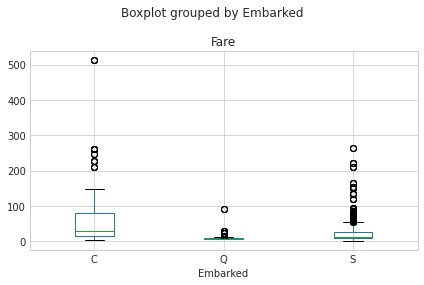

In [25]:
train_df.boxplot(column = "Fare" , by = "Embarked")
plt.tight_layout()
plt.show()

In [26]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
# Let's check
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [27]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [28]:
np.mean(train_df[train_df["Pclass"] == 3]["Fare"])        

12.741219971469327

In [29]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))
# Let's check
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id = "11"></a>
# VISUALIZATION

<a id = "12"></a>
## Correlation Between (SibSp -- Parch -- Age -- Fare -- Survived)

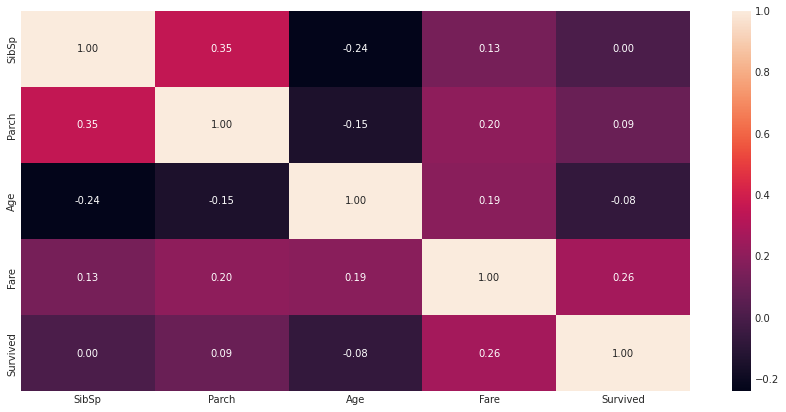

In [30]:
liste = ["SibSp" , "Parch" , "Age" , "Fare" , "Survived"]
plt.figure(figsize = (15,7))
sns.heatmap(train_df[liste].corr(), annot  = True , fmt = ".2f")
plt.show()

* Fare features seems to have correlation with survived feature (.26)

<a id = "13"></a>
## SibSp -- Survived

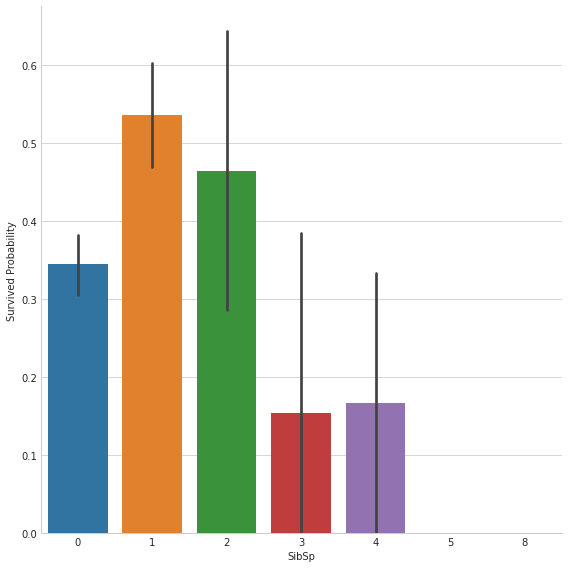

In [31]:
g = sns.factorplot(x = "SibSp", y = "Survived" , kind = "bar" , size = 8 , data = train_df )
g.set_ylabels("Survived Probability")
plt.show()

* Having a lot of SibSp have less chance to Survived
* If Sibsp == (0,1,2) passenger has  more chance to survive
* We can consider a new feature describing these categories

<a id = "14"></a>
## Parch -- Survived

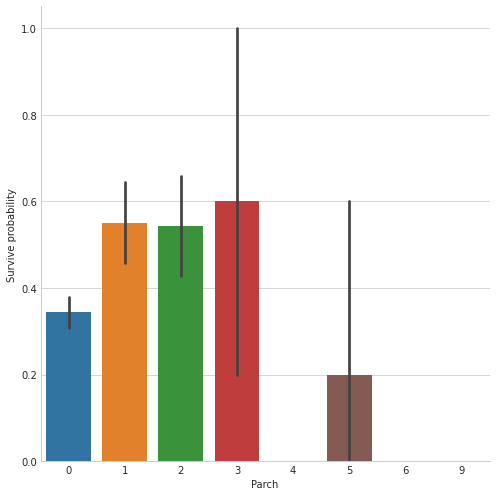

In [32]:
g = sns.factorplot(x = "Parch" , y = "Survived" , kind = "bar" , size = 7 , data = train_df)
g.set_ylabels("Survive probability")
plt.show()

* SibSp and Parch can be used for new feature extraction with th = 3
* Small familes have more chance for survive
* There is a std in survival of passenger with parch = 3

<a id = "15"></a>
## Pclass -- Survived

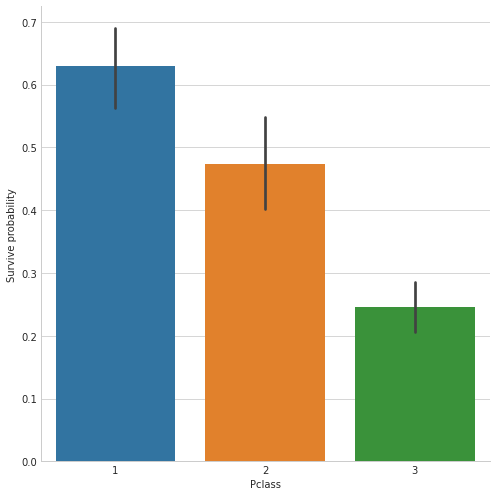

In [33]:
g = sns.factorplot(x = "Pclass" , y = "Survived" , kind = "bar" , size = 7 , data = train_df)
g.set_ylabels("Survive probability")
plt.show()

<a id = "16"></a>
## Age-- Survived

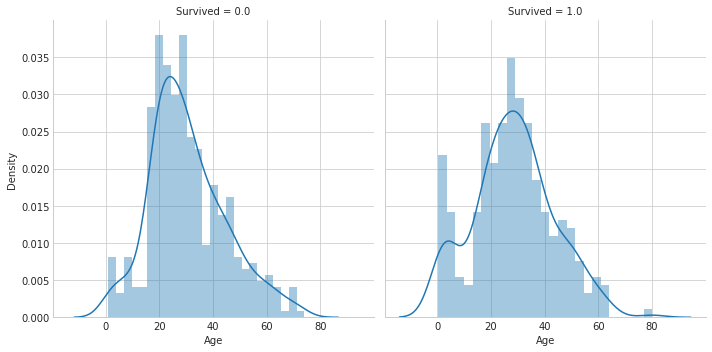

In [34]:
g = sns.FacetGrid(train_df , col = "Survived" , size = 5)
g.map(sns.distplot , "Age" , bins = 25)
plt.show()

* age <= 10 high ratio for survival rate
* oldest passengers survived
* Large number of 20 years old did not survive
* Most passenger are in 15 - 35 age range
* Use age featrue in training
* Use age distribution for missing value of age

<a id = "17"></a>
## Pclass -- Survived -- Age

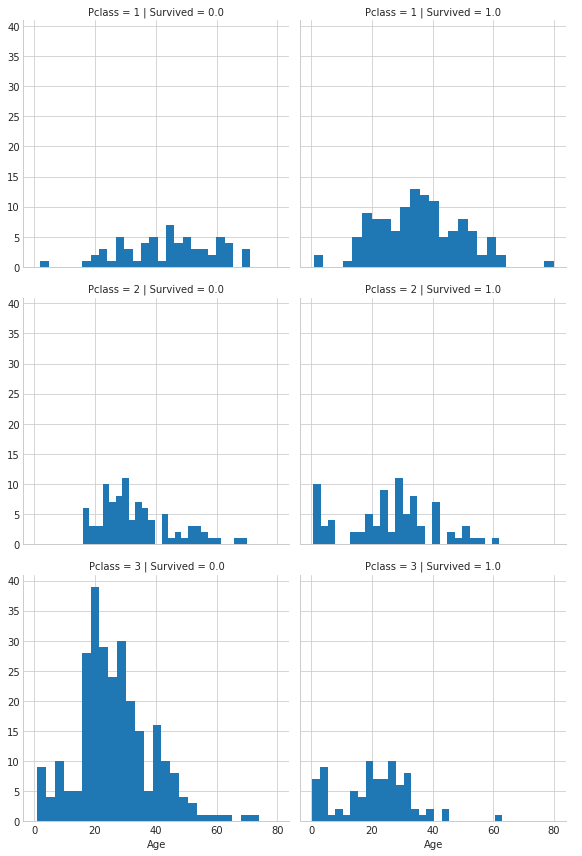

In [35]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass" , size = 4)
g.map(plt.hist , "Age" , bins = 25)
g.add_legend()
plt.show()

* Pclass feature important for model training 

<a id = "18"></a>
## Embarked -- Sex -- Pclass -- Survived

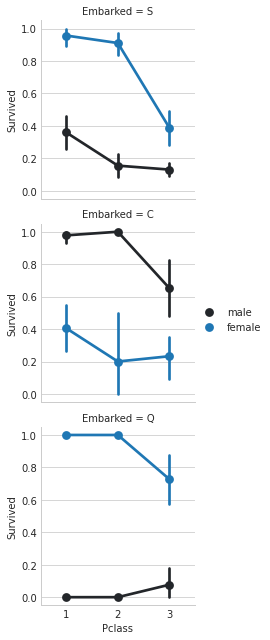

In [36]:
g = sns.FacetGrid(train_df, row = "Embarked", size = 3)
g.map(sns.pointplot , "Pclass" , "Survived" , "Sex")
g.add_legend()
plt.show()

* Female passengers have much better survival rate than males.
* Males have better survival rate in pclass 3 in C.
* Embarked and sex will be used in training.

<a id = "19"></a>
## Embarked -- Sex -- Fare -- Survived

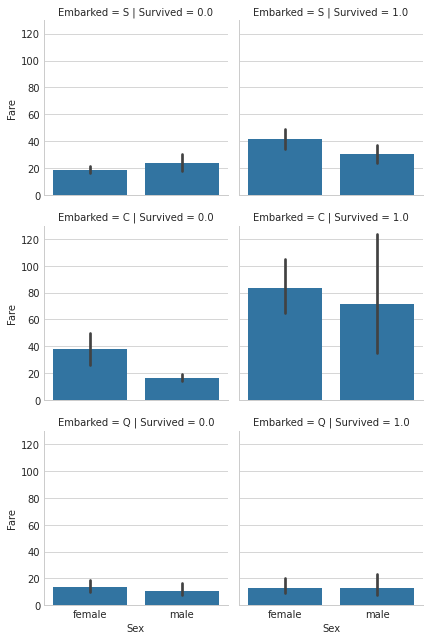

In [37]:
g = sns.FacetGrid(train_df , row = "Embarked" ,col = "Survived", size = 3)
g.map(sns.barplot , "Sex" , "Fare")
g.add_legend()
plt.show()

* Passsengers who pay higher fare have better survival. Fare can be used as categorical for training.

<a id = "20"></a>
## Fill Missing : Age Feature

In [38]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


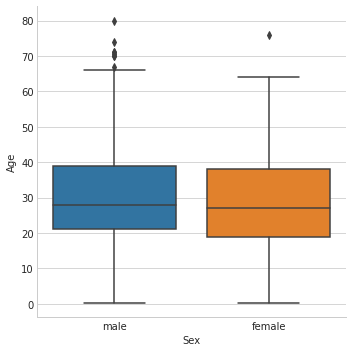

In [39]:
sns.factorplot(x = "Sex" , y = "Age" , kind = "box" , data = train_df)
plt.show()

* Sex is not informative for age prediction , age distribution seems to be same

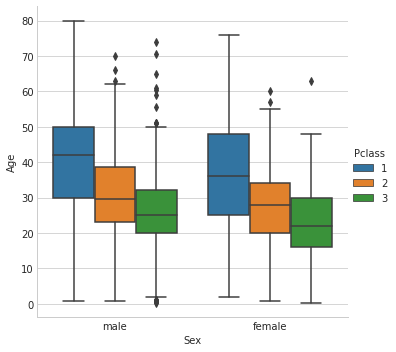

In [40]:
sns.factorplot(x = "Sex" , y = "Age" , kind = "box" , data = train_df , hue = "Pclass")
plt.show()

* first class passengers are older than second passengers , second older than third

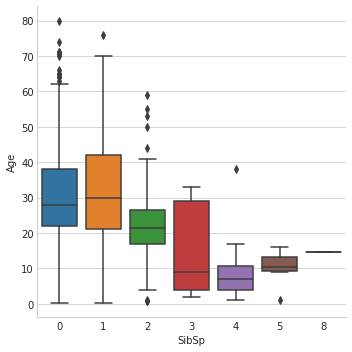

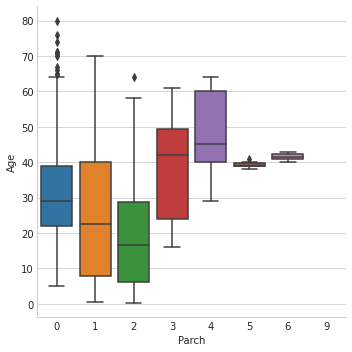

In [41]:
sns.factorplot(x = "SibSp" , y = "Age" , kind = "box" , data = train_df)
sns.factorplot(x = "Parch" , y = "Age" , kind = "box" , data = train_df)
plt.show()

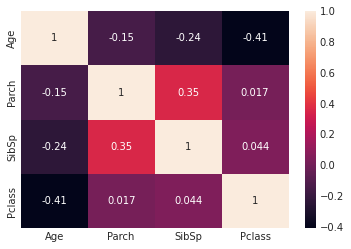

In [42]:
sns.heatmap(train_df[["Age", "Parch" , "SibSp" , "Pclass"]].corr() , annot = True)
plt.show()

* Age is not correlated with sex but it is correlated with parch, sibsp and pclass.

In [43]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)

for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) & (train_df["Parch"] == train_df.iloc[i]["Parch"]) & (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [44]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id = "22"></a>
# Feature Engineering

<a id = "23"></a>
## Name -- Title

In [45]:
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [46]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

# strip boşluğu kaldırır

In [47]:
train_df["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

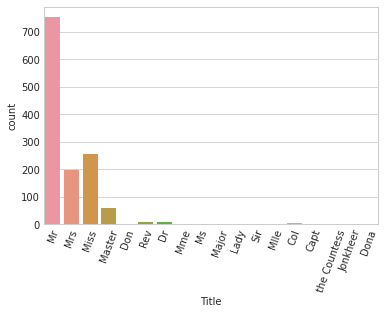

In [48]:
sns.countplot(x = "Title" , data = train_df)
plt.xticks(rotation = 70)
plt.show()

In [49]:
# convert to categorical 

train_df["Title"] = train_df["Title"].replace(["Don","Rev","Dr","Mme","MAjor","Lady","Sir","Col","Capt","the Countness","jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]


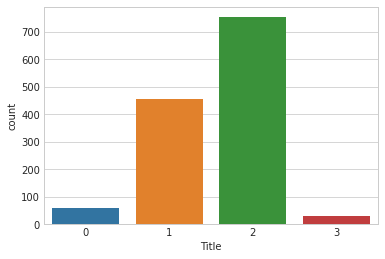

In [50]:
sns.countplot(x = "Title" , data = train_df)
plt.xticks(rotation = 0)
plt.show()

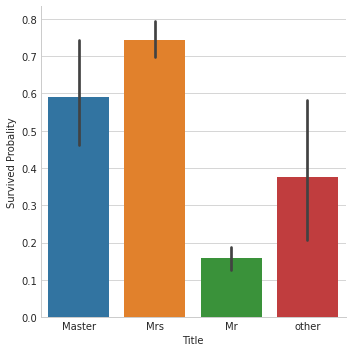

In [51]:
g = sns.factorplot(x = "Title" , y = "Survived" ,data = train_df , kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","other"])
g.set_ylabels("Survived Probality")
plt.show()

In [52]:
train_df.drop(labels = ["Name"] , axis = 1 , inplace = True)

In [53]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


In [54]:
train_df = pd.get_dummies(train_df,columns = ["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


<a id = "24"></a>
## Family Size 

In [55]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


In [56]:
train_df["Famsize"] = train_df["SibSp"] + train_df["Parch"] + 1
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Famsize
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


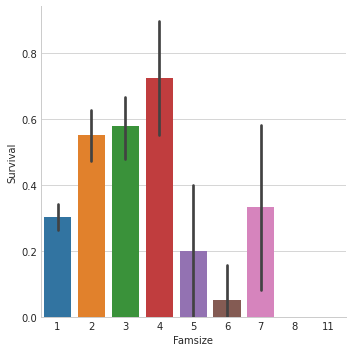

In [57]:
g = sns.factorplot(x = "Famsize" , y = "Survived" , data = train_df , kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [58]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Famsize"]]
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Famsize,family_size
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1


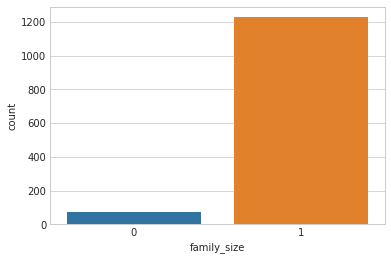

In [59]:
sns.countplot(x = "family_size" , data = train_df)
plt.show()

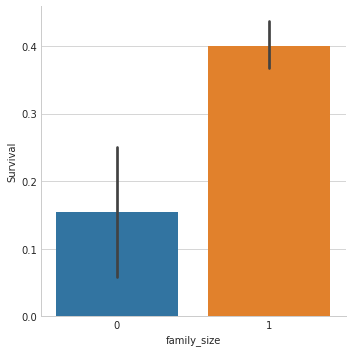

In [60]:
g = sns.factorplot(x = "family_size" , y = "Survived" , data = train_df , kind = "bar") 
g.set_ylabels("Survival")
plt.show()

In [61]:
train_df = pd.get_dummies(train_df , columns = ["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Famsize,family_size_0,family_size_1
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1


<a id = "25"></a>
## Embarked

In [62]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

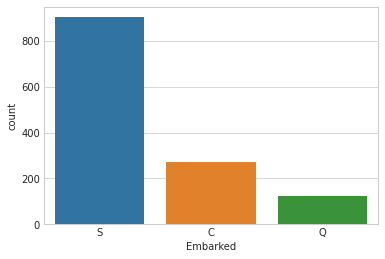

In [63]:
sns.countplot(x = "Embarked" , data = train_df)
plt.show()

In [64]:
train_df = pd.get_dummies(train_df , columns = ["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Famsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


<a id = "26"></a>
# Ticket

In [65]:
train_df["Ticket"].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [66]:
tickets = []

for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets                

In [67]:
train_df["Ticket"].head(30)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
20         x
21         x
22         x
23         x
24         x
25         x
26         x
27         x
28         x
29        PC
Name: Ticket, dtype: object

In [68]:
# prefix : versiğin ismi ya<ıyor 

train_df = pd.get_dummies(train_df , columns = ["Ticket"] , prefix = "T")
train_df.head(30)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,male,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,female,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,female,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,female,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,male,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0.0,3,male,25.0,0,0,8.4583,NaN,0,...,0,0,0,0,0,0,0,0,0,1
6,7,0.0,1,male,54.0,0,0,51.8625,E46,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0.0,3,male,2.0,3,1,21.0750,NaN,1,...,0,0,0,0,0,0,0,0,0,1
8,9,1.0,3,female,27.0,0,2,11.1333,NaN,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1.0,2,female,14.0,1,0,30.0708,NaN,0,...,0,0,0,0,0,0,0,0,0,1


<a id = "27"></a>
# Pclass

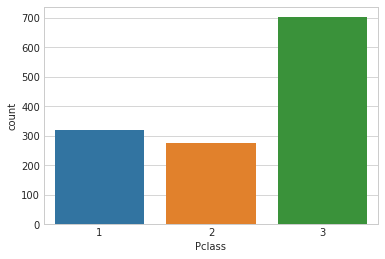

In [69]:
sns.countplot(x = "Pclass" , data = train_df)
plt.show()

In [70]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df , columns = ["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,male,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,female,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,female,26.0,0,0,7.9250,NaN,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,female,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,male,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


<a id = "28"></a>
# Sex

In [71]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df , columns = ["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0.0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1.0,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1.0,26.0,0,0,7.9250,NaN,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,4,1.0,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0.0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


<a id = "29"></a>
# Drop Passenger ID and Cabin

In [72]:
train_df.drop(labels = ["PassengerId" , "Cabin"] , axis = 1 , inplace = True)
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Famsize,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0.0,22.0,1,0,7.2500,0,0,1,0,2,...,0,0,0,0,0,0,0,1,0,1
1,1.0,38.0,1,0,71.2833,0,1,0,0,2,...,0,0,0,0,0,1,0,0,1,0
2,1.0,26.0,0,0,7.9250,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,1.0,35.0,1,0,53.1000,0,1,0,0,2,...,0,0,0,0,1,1,0,0,1,0
4,0.0,35.0,0,0,8.0500,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1


<a id = "30"></a>
# Modeling

In [73]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<a id = "31"></a>
## Train - Test Split

In [74]:
train_df_len

881

In [75]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"] , axis  = 1 , inplace = True)

In [76]:
train = train_df[:train_df_len]
x_train = train.drop(labels = "Survived" , axis = 1)
y_train = train["Survived"]
x_train , x_test , y_train , y_test = train_test_split(x_train , y_train , test_size = 0.33 , random_state = 42)
print("x_train",len(x_train))
print("y_train",len(y_train))
print("x_test",len(x_test))
print("y_test",len(x_test))
print("test",len(test))

x_train 590
y_train 590
x_test 291
y_test 291
test 418


<a id = "32"></a> 
# Simple Logistic Regression

In [77]:
logreg = LogisticRegression(solver = "liblinear")
logreg.fit(x_train , y_train)
acc_log_train = round(logreg.score(x_train , y_train)*100,2)
acc_log_test = round(logreg.score(x_test , y_test)*100,2)
print("Training Accuracy :",acc_log_train)
print("Testing Accuracy :",acc_log_test)

Training Accuracy : 83.22
Testing Accuracy : 81.79


<a id = "33"></a> 
# Hyperparameter Tuning -- Grid Search -- Cross Validation

### Decision Tree  SVM  Random Forest  KNN  Logistic Regression

In [78]:
random_state = 42

classifier = [DecisionTreeClassifier(random_state = random_state) , SVC(random_state = random_state) , RandomForestClassifier(random_state = random_state) , LogisticRegression(random_state = random_state) , KNeighborsClassifier()]

dt_param_grid = {"min_samples_split":range(10,500,20),"max_depth": range(1,20,2)}

svc_param_grid = {"kernel":["rbf"],"gamma":[0.001, 0.01, 0.1, 1],"C":[1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features":[1,3,10],"min_samples_split":[2,3,10],"bootstrap":[False],"n_estimators" : [100,300],"criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),"penalty":["l1","l2"]}

knn_param_grid = {"n_neighbors":np.linspace(1,19,10 , dtype = int).tolist(),"weights":["uniform","distance"] , "metric":["euclidean","manhattan"]}

classifier_param = [dt_param_grid,svc_param_grid,rf_param_grid,logreg_param_grid,knn_param_grid]


In [79]:
# n_jobs = -1: paralel şekilde yapılıp hızlı olmasını sağlıyor 
# verbose = 1 :  ekrana yazdır çalışırken


cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8355932203389831
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.7983050847457627
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   18.5s finished


0.8305084745762713
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFai

0.7864406779661016
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.3s


0.7796610169491525


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.6s finished


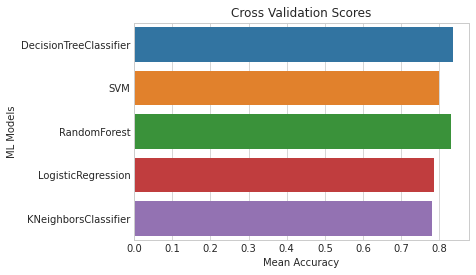

In [80]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier" ,"SVM","RandomForest","LogisticRegression","KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means","ML Models",data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")
plt.show()

<a id = "34"></a> 
# Ensemble Modeling

In [81]:
# voting classifier çoğunluğa bakarak cevap veriyor 
# soft parameter : 0.5 + 0.8 + 0.3  gibi toplayıp karşılaştırıp (binary) buluyor
# hard parameter : 1  1 0 = 1 diye karar veriyor
 

votingC = VotingClassifier(estimators = [("dt" , best_estimators[0]) , ("rfc",best_estimators[2]) , ("lr" , best_estimators[3])], voting = "soft" ,n_jobs = -1)
votingC = votingC.fit(x_train,y_train)
print(accuracy_score(votingC.predict(x_test),y_test))

0.8350515463917526


<a id = "35"></a> 
# Prediction and Submission

In [82]:
test_survived = pd.Series(votingC.predict(test),name = "Survived").astype(int)
results = pd.concat([test_passengersId, test_survived],axis = 1)
results.to_csv("titanic.csv",index = False)